In [2]:
#load packages
library(tidyverse)
library(reshape2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



### Read in Files 

In [3]:
df_austism <- read_csv("data/raw_autism_screening_children.csv")
df_austism_train <- read_csv("data/raw_autism_screening_children_X_train.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  gender = col_character(),
  ethnicity = col_character(),
  jundice = col_character(),
  austim = col_character(),
  contry_of_res = col_character(),
  used_app_before = col_character(),
  age_desc = col_character(),
  relation = col_character(),
  `Class/ASD` = col_character()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_double(),
  gender = col_character(),
  ethnicity = col_character(),
  jundice = col_character(),
  austim = col_character(),
  contry_of_res = col_character(),
  used_app_before = col_character(),
  age_desc = col_character(),
  relation = col_character()
)
See spec(...) for full column specifications.


## Clean Names

In [4]:
names(df_austism) <- make.names(names(df_austism))

## Shape of Dataframe

In [5]:
#Check number of rows 
print(paste0("Dataframe has ", nrow(df_austism), " rows"))
print(paste0("Dataframe has ", ncol(df_austism), " columns"))

[1] "Dataframe has 292 rows"
[1] "Dataframe has 21 columns"


In [6]:
set.seed(2020)
sample_size <- floor(0.8 * nrow(df_austism))
df_austism_sample <- sample(seq_len(nrow(df_austism)), size = sample_size)

## Structure

In [7]:
#Check Structure
str(df_austism)

Classes ‘spec_tbl_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	292 obs. of  21 variables:
 $ A1_Score       : num  1 1 1 0 1 0 1 1 1 0 ...
 $ A2_Score       : num  1 1 1 1 1 0 0 1 1 0 ...
 $ A3_Score       : num  0 0 0 0 1 1 1 1 1 1 ...
 $ A4_Score       : num  0 0 0 0 1 0 1 1 1 1 ...
 $ A5_Score       : num  1 1 0 1 1 1 1 1 1 1 ...
 $ A6_Score       : num  1 1 1 1 1 1 1 1 1 0 ...
 $ A7_Score       : num  0 0 1 0 1 0 0 1 1 1 ...
 $ A8_Score       : num  1 1 1 0 1 1 1 1 0 1 ...
 $ A9_Score       : num  0 0 0 0 1 0 0 0 0 0 ...
 $ A10_Score      : num  0 0 0 1 1 1 1 0 0 0 ...
 $ age            : num  6 6 6 5 5 4 5 5 11 11 ...
 $ gender         : chr  "m" "m" "m" "f" ...
 $ ethnicity      : chr  "Others" "Middle Eastern" NA NA ...
 $ jundice        : chr  "no" "no" "no" "yes" ...
 $ austim         : chr  "no" "no" "no" "no" ...
 $ contry_of_res  : chr  "Jordan" "Jordan" "Jordan" "Jordan" ...
 $ used_app_before: chr  "no" "no" "yes" "no" ...
 $ result         : num  5 5 5 4 10 5 7 8 7 5 ...
 $ ag

- `A1-A10` scores are numerical which is an appropriate data type for analysis downstream.
- `Age` is numerical which is an appropriate data type for analysis downstream.
- `Ethnicity` is character which may be appropriate for analyses. 
	- There seems to be some number of NAs further digging into this variable is needed.  
- `Gender` is a character: however, it should be changed to a factor. 
- `Jundice` is a character: however, it should be changed to a factor.
- `austim` is a character: however, it should be changed to a factor.
- `contry_of_res` is a character which is an appropriate data type for analysis downstream.
- `used_app_before` is a character: however, it should be changed to a factor.
- `result` is numerical which is an appropriate data type for analysis downstream.
- `Age_desc` is a character: however, it should be changed to a factor.
	- However, this column might be redundant with age.
- `Relation` is character which may be appropriate for analyses. 
	- There seems to be some number of NAs further digging into this variable is needed. 
- `Class.ASD` is a character: however, it should be changed to a factor.


## Clean and Explore Columns

In [8]:
columns_chng_factor_full <- c("gender", 'jundice', 'austim', 'used_app_before', 'Class.ASD')
columns_chng_factor_train <- c("gender", 'jundice', 'austim', 'used_app_before')

In [9]:
#Fix factor level
for (col in columns_chng_factor_full) {
    df_austism[[col]] <- as.factor(df_austism[[col]])
    
}

for (col in columns_chng_factor_train) {
    df_austism_train[[col]] <- as.factor(df_austism_train[[col]])  
}




In [10]:
#Digging into ethnicity
print(unique(df_austism$ethnicity))
print(paste0("There is ", sum(is.na(df_austism$ethnicity)), "NAs"))


 [1] "Others"         "Middle Eastern" NA               "White-European"
 [5] "Black"          "South Asian"    "Asian"          "Pasifika"      
 [9] "Hispanic"       "Turkish"        "Latino"        
[1] "There is 43NAs"


> There seems to be a large amount of NA’s in the ethnicity column it might need to be dropped downstream. 

In [11]:
#Digging into relation
print(unique(df_austism$relation))
print(paste0("There is ", sum(is.na(df_austism$relation)), "NAs"))


[1] "Parent"                   NA                        
[3] "Self"                     "Relative"                
[5] "Health care professional" "self"                    
[1] "There is 43NAs"


> There seems to be a large amount of NA’s in the relation column it might need to be dropped downstream

### From here onwards, the training set of X will be be used instead of the main dataframe to prevevent the Golden Rule from being violated. 

In [12]:
summary(df_austism_train)

    A1_Score         A2_Score         A3_Score         A4_Score     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :1.0000  
 Mean   :0.6223   Mean   :0.5322   Mean   :0.7296   Mean   :0.5451  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                    
    A5_Score         A6_Score         A7_Score         A8_Score     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.0000   Median :0.0000  
 Mean   :0.7425   Mean   :0.7124   Mean   :0.6052   Mean   :0.4807  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000  

- `A1_Score` 62.23% answered yes 
- `A2_Score` 53.22% answered yes 
- `A3_Score` 72.96% answered yes 
- `A4_Score` 54.51% answered yes 
- `A5_Score` 74.25% answered yes 
- `A6_Score` 71.24% answered yes 
- `A7_Score` 60.52% answered yes 
- `A8_Score` 48.07% answered yes 
- `A9_Score` 48.07% answered yes 
- `A10_Score` 72.96% answered yes 
- `age` ranges from 4 to 11 with the median age being 6. There is a skew to a younger audience that participanted. 
- `gender` there is a 30% female and 70% male split
- `used_app_before` not a lot of individuals used the app before taking the Autism Spectrum Quotient-10

### Make a plot

Saving 7 x 7 in image


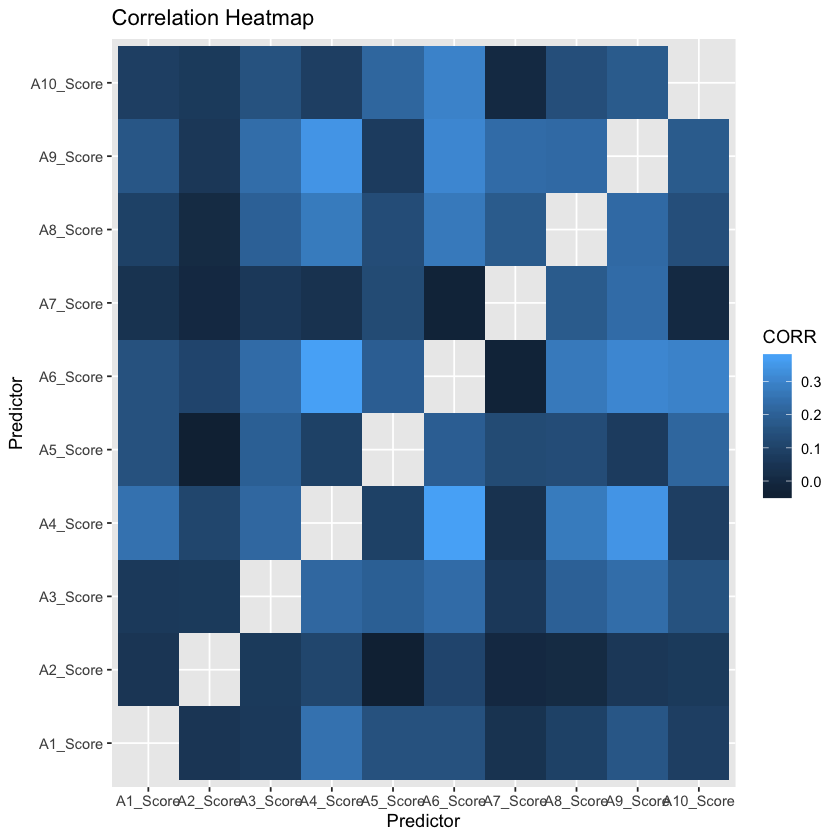

In [16]:
a_score <- c('A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score')


corr_heatmap <- df_austism_train  %>% 
    select(a_score)  %>% 
    cor() %>% 
    melt() %>% 
    filter(value < 1) %>% 
    ggplot(aes(x=Var1, y=Var2, fill = value))+
    geom_tile()+
    ggtitle("Correlation Heatmap")+
    xlab("Predictor")+
    ylab("Predictor")+
    labs(fill = "CORR")

corr_heatmap

ggsave("img/01_corr_heatmap.png")

> None of the questions in the Autism Spectrum Quotient-10 are highly correlated with each other. This makes the test more valid as questions are not related to each other more independent.

## Follow-up Questions

1.	Do you have the right data? Yes, I think the data fits answering our question of finding the three features that most strongly predicts whether an individual will be diagnosed with Autism Spectrum Disorder. 

2.	Do you need other data? Due to the fact that this data frame only has 292 examples we could use more examples. However, due to the expense of collecting more examples we will have to make do with this limited dataset. 

3.	Do you have the right question? We can still look for the three features that most strongly predict whether an individual will be diagnosed with Autism Spectrum Disorder. However, due to the large amount of NA’s in some sections those features may have to be dropped. Our analysis may focus on the Autism Spectrum Quotient-10 but, it is a good sign that the Autism Spectrum Quotient-10 questions are not correlated. 